In [4]:
import numpy as np
import matplotlib.pyplot as plt

file_paths = [
    'output/R2280/R2280_decoding.npy',
]
score = np.load(file_paths[0])
print(score.shape)


(5, 100)


In [12]:
mean_score = np.mean(score, axis=0)
print(mean_score)


[0.49969136 0.50020576 0.49430727 0.49434156 0.49139232 0.4936214
 0.49039781 0.48820302 0.46899863 0.49252401 0.5010631  0.5026406
 0.49276406 0.49691358 0.49533608 0.4957476  0.49077503 0.49005487
 0.48854595 0.49125514 0.50421811 0.50164609 0.49441015 0.49674211
 0.49320988 0.49423868 0.4888203  0.49108368 0.48981481 0.49379287
 0.50144033 0.50181756 0.4951989  0.49814815 0.49492455 0.49862826
 0.4898834  0.49056927 0.46927298 0.48960905 0.50024005 0.4994513
 0.49588477 0.49543896 0.4941358  0.49451303 0.48930041 0.49022634
 0.48930041 0.49118656 0.49921125 0.5016118  0.4957476  0.49845679
 0.49441015 0.49513032 0.49036351 0.48871742 0.48854595 0.49122085
 0.50137174 0.50102881 0.49561043 0.49821674 0.4936214  0.49585048
 0.49070645 0.48957476 0.4888203  0.49214678 0.50243484 0.50192044
 0.49516461 0.49674211 0.49300412 0.49684499 0.48943759 0.47030178
 0.48395062 0.4888546  0.50281207 0.5021262  0.49578189 0.49564472
 0.49475309 0.49389575 0.48909465 0.48947188 0.48947188 0.4933127

In [15]:
def map_augmented_scores_to_original(scores_augmented, window_size, step_size, n_time_points):
    """
    Maps scores from augmented windows back to the original time axis by aggregating overlapping windows.

    Parameters:
    - scores_augmented: ndarray of shape (n_windows,), decoding scores for augmented windows.
    - window_size: int, size of the sliding window in time steps.
    - step_size: int, step size for sliding windows in time steps.
    - n_time_points: int, total number of original time points.

    Returns:
    - scores_original: ndarray of shape (n_time_points,), aggregated decoding scores.
    """
    # Initialize arrays to store the aggregated scores and counts
    scores_sum = np.zeros(n_time_points)
    counts = np.zeros(n_time_points)

    # Map augmented scores to the original time points
    start_idx = 0
    for score in scores_augmented:
        end_idx = start_idx + window_size
        # Accumulate scores and counts for overlapping time points
        scores_sum[start_idx:end_idx] += score
        counts[start_idx:end_idx] += 1
        start_idx += step_size

    # Avoid division by zero and compute the mean scores
    scores_original = scores_sum / np.maximum(counts, 1)
    return scores_original


# Map augmented scores back to original time points
window_size = 100
step_size = 10  # Example step size
n_time_points = 2521

scores_original = map_augmented_scores_to_original(score, window_size, step_size, n_time_points)

print(scores_original.shape)

(2521,)


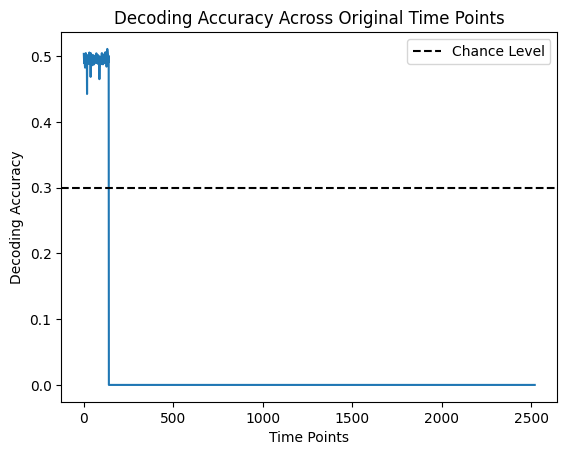

In [16]:
# Plot decoding accuracy over the original time axis
plt.plot(np.arange(n_time_points), scores_original)
plt.axhline(0.3, color='k', linestyle='--', label='Chance Level')
plt.xlabel('Time Points')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Across Original Time Points')
plt.legend()
plt.show()


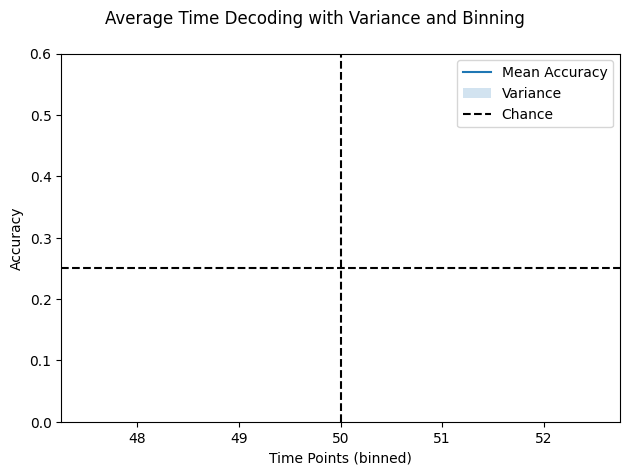

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_average_time_decoding_with_variance_and_binning(file_paths, title, subj, n_classes, bin_size=10):
    # Read the data from the specified files
    data_list = [np.load(file_path) for file_path in file_paths]

    # Calculate mean and standard deviation
    scores_mean = np.mean(data_list, axis=0)
    scores_std = np.std(data_list, axis=0)
    
    # Reshape and average every `bin_size` time points
    n_time_points = scores_mean.shape[0]
    n_bins = n_time_points // bin_size
    binned_mean = scores_mean[:n_bins * bin_size].reshape(n_bins, bin_size).mean(axis=1)
    binned_std = scores_std[:n_bins * bin_size].reshape(n_bins, bin_size).mean(axis=1)
    
    # Plotting
    time_points = np.arange(n_bins) * bin_size
    
    plt.plot(time_points, binned_mean, label='Mean Accuracy')
    plt.fill_between(time_points, binned_mean - binned_std, binned_mean + binned_std, alpha=0.2, label='Variance')
    plt.ylim(0, 0.6)
    plt.axhline(1/n_classes, color='k', linestyle='--', label='Chance')
    plt.axvline(50, color='k', linestyle='--')
    plt.xlabel('Time Points (binned)')
    plt.ylabel('Accuracy')
    plt.suptitle(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_average_time_decoding_with_variance_and_binning(file_paths, 'Average Time Decoding with Variance and Binning', 'Subject', n_classes=4)